При выполнении инженерно-геологических изысканий может возникнуть задача, связанная с сопоставлением данных полевых и лабораторных исследований на одних и тех же грунтах, с целью подтверждения корректной транспортировки проб от объекта изысканий до лаборатории (образцы не были деформированы и/или разрушены в ходе перевозки).

При данной постановке задачи можно применить методику A/B-тестирования со следующими параметрами:
измеряемой метрикой будет среднее значение плотности скелета грунта (г/см3), характеризующее сложение проб. Данная величина имеет нормальный закон распределения;
критерием проверки гипотезы будет служить t-критерий (критерий Стьюдента): для двух независимых выборок, если сопоставляемые полевые (до транспортировки) и лабораторные (после транспортировки) данные проводились на разных пробах грунта; для двух зависимых выборок, если исследования выполнены на одних и тех же пробах.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.weightstats import *

1) Значения будут генерироваться.\
2) ES - показательная величина, характеризующая различие, которое мы хотим выявить, равная отношению разности средних значений по выборкам к взвешенному стандартному отклонению. Чтобы её уменьшить нужно больше сделать замеров!

In [3]:
effect = 0.5 # (ES)
alpha = 0.05 # вероятность выявить различия между средними при их отсутствии
power = 0.8 # вероятность выявления установленного различия между средними значениями

analysis = TTestIndPower()

#Оценка размера выборки (для достоверности)
size = analysis.solve_power(effect, power=power, alpha=alpha)

print(f'Размер выборки, шт.: {int(size)}')

Размер выборки, шт.: 63


Измеряемая физическая характеристика грунта имеет нормальный закон распределения (как и многие другие измерения). В рамках данного примера зададим генератору следующие значения среднего (X̄) и стандартного отклонения (S):

для первой выборки – X̄1= 1,65 г/см3, S1 = 0.15 г/см3;

для второй – X̄2 = 1,60 г/см3, S2 = 0.15 г/см3.

In [4]:
loc_1 = 1.65
sigma_1 = 0.15

loc_2 = 1.60
sigma_2 = 0.15

sample_size = 65
#Генерируем выборки с заданными параметрами
sample_1 = np.random.normal(loc=loc_1, scale=sigma_1, size=sample_size)
sample_2 = np.random.normal(loc=loc_2, scale=sigma_2, size=sample_size)

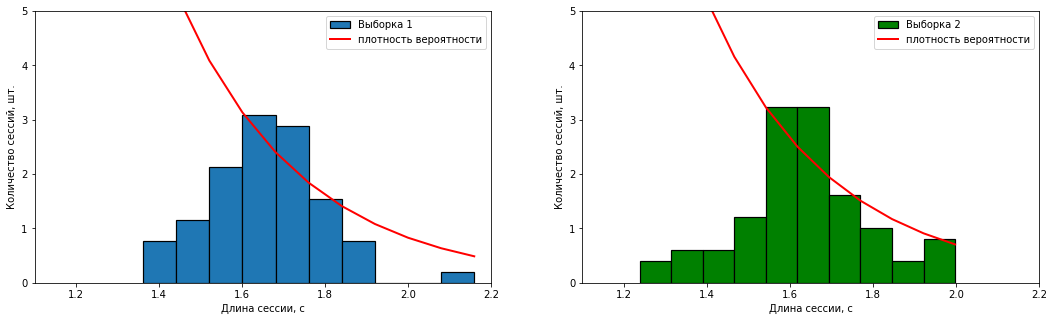

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))

max_y = np.max(np.hstack([sample_1,sample_2]))
#Гистрограмма по выборке 1
count_1, bins_1, ignored_1 = axes[0].hist(sample_1, 10, density=True, 
                                          label="Выборка 1", edgecolor='black',
                                          linewidth=1.2)
axes[0].plot(bins_1, 1/(sigma_1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins_1 - loc_1) / (2 * sigma_1)),
         linewidth=2, color='r', label='плотность вероятности')
axes[0].legend()
axes[0].set_xlabel(u'Длина сессии, с')
axes[0].set_ylabel(u'Количество сессий, шт.')
axes[0].set_ylim([0, 5])
axes[0].set_xlim([1.1, 2.2])

#Гистрограмма по выборке 2
count_2, bins_2, ignored_2 = axes[1].hist(sample_2, 10, density=True, 
                                          label="Выборка 2", edgecolor='black', 
                                          linewidth=1.2, color="green")
axes[1].plot(bins_2, 1/(sigma_2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins_2 - loc_2) / (2 * sigma_2)),
         linewidth=2, color='r', label='плотность вероятности')
axes[1].legend()
axes[1].set_xlabel(u'Длина сессии, с')
axes[1].set_ylabel(u'Количество сессий, шт.')
axes[1].set_ylim([0, 5])
axes[1].set_xlim([1.1, 2.2])
plt.show()

Нулевая гипотеза H0: средние значения равны μ1 = μ2.

Альтернативная гипотеза H1: средние не равны μ1 ≠ μ2.

### Вариант 1. Для двух независимых выборок

С помощью двухвыборочного критерия Стьюдента проверяется гипотезу о равенстве средних выборок.

In [6]:
t_st, p_val = scipy.stats.ttest_ind(sample_1, sample_2, equal_var = False)
print(f't-критерий составил {round(t_st, 2)}')
print(f'Рассчитанный t-критерий дает достигаемый \
уровень значимости (p-value) равный {round(p_val, 3)}')

t-критерий составил 1.04
Рассчитанный t-критерий дает достигаемый уровень значимости (p-value) равный 0.301


Нулевая гипотеза H0 о том, что средняя плотность скелета грунта не изменилась после транспортировки не отвергается на уровне значимости 0,05.

### Вариант 2. Для двух связанных выборок 

Проверка нулевой гипотезы об отсутствии изменений в плотности грунта при транспортировке будет осуществляться с помощью двухвыборочного критерия Стьюдента для связанных выборок.

In [7]:
# Для расчета достигаемого уровня значимости воспользуемся методом ttest_rel модуля stats
t_st, p_val = stats.ttest_rel(sample_1, sample_2)
print(f't-критерий составил {round(t_st, 2)}')
print(f'Рассчитанный t-критерий дает достигаемый \
уровень значимости (p-value) равный {round(p_val, 3)}')

t-критерий составил 1.09
Рассчитанный t-критерий дает достигаемый уровень значимости (p-value) равный 0.279


Нулевая гипотеза H0 о том, что средняя плотность скелета грунта не изменилась после транспортировки, не отвергается на уровне значимости 0,05.